<a href="https://colab.research.google.com/github/bandiamithsreenivasareddy/Speech-Processing/blob/main/speechasignment1_23104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving LJ050-0274.wav to LJ050-0274 (1).wav


In [6]:
!pip install librosa soundfile scipy pydub


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import resample
from pydub import AudioSegment
from IPython.display import Audio


In [10]:
"""# Convert M4A to WAV
m4a_file = "speechassignment1.m4a" """
wav_file = "LJ050-0274.wav"

"""audio = AudioSegment.from_file(m4a_file, format="m4a")
audio.export(wav_file, format="wav")

print("Conversion complete: M4A → WAV")
"""

'audio = AudioSegment.from_file(m4a_file, format="m4a")\naudio.export(wav_file, format="wav")\n\nprint("Conversion complete: M4A → WAV")\n'

In [11]:
y, sr = librosa.load(wav_file, sr=None)

print("Sample Rate:", sr)
print("Number of Samples:", len(y))
print("Duration (seconds):", len(y)/sr)


Sample Rate: 22050
Number of Samples: 99229
Duration (seconds): 4.500181405895692


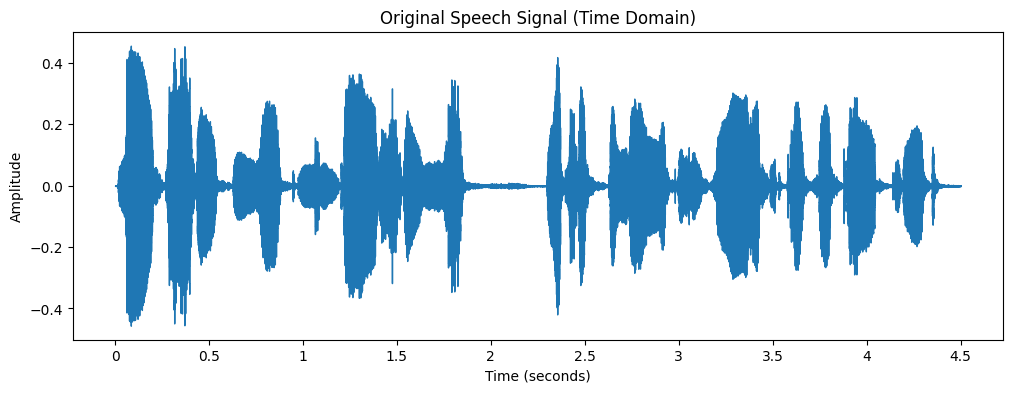

In [12]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Original Speech Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [13]:
frame_length = 1024
hop_length = 512

energy = np.array([
    np.sum(np.abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

threshold = np.mean(energy) * 0.1
active_frames = energy > threshold
active_duration = np.sum(active_frames) * (hop_length/sr)

print("Total Duration:", len(y)/sr, "seconds")
print("Active Speech Duration:", active_duration, "seconds")


Total Duration: 4.500181405895692 seconds
Active Speech Duration: 3.297233560090703 seconds


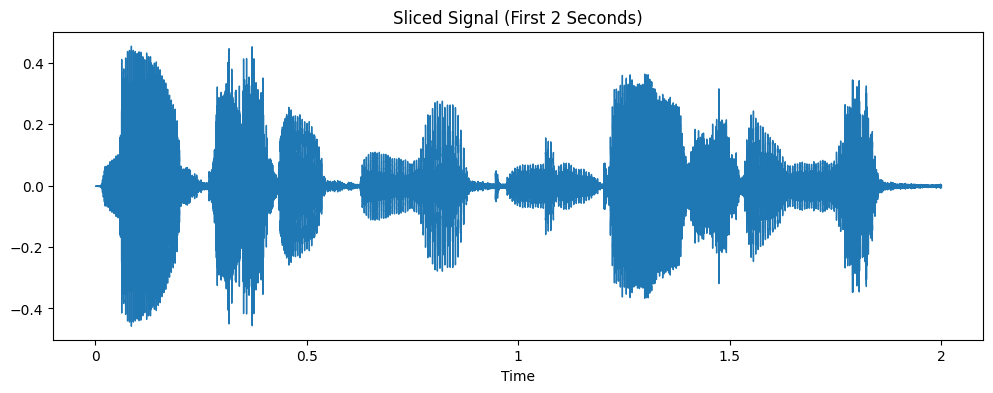

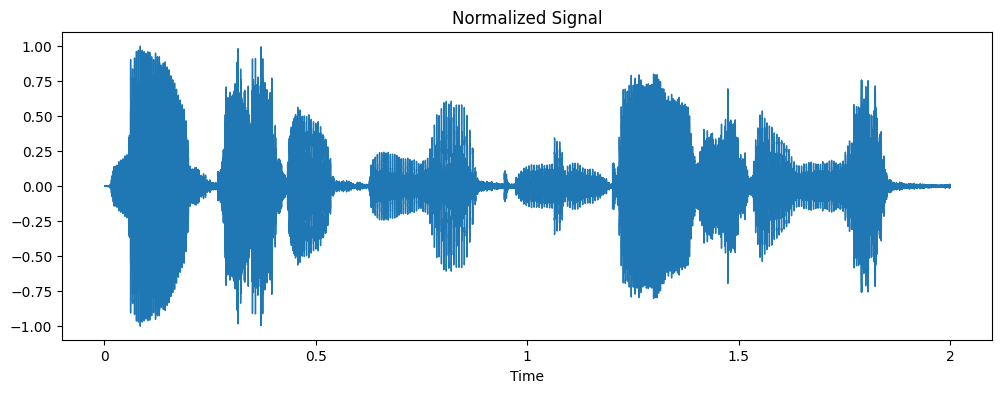

In [14]:

slice_duration = 2
num_samples = int(slice_duration * sr)
y_slice = y[:num_samples]


y_norm = y_slice / np.max(np.abs(y_slice))


plt.figure(figsize=(12,4))
librosa.display.waveshow(y_slice, sr=sr)
plt.title("Sliced Signal (First 2 Seconds)")
plt.show()


plt.figure(figsize=(12,4))
librosa.display.waveshow(y_norm, sr=sr)
plt.title("Normalized Signal")
plt.show()


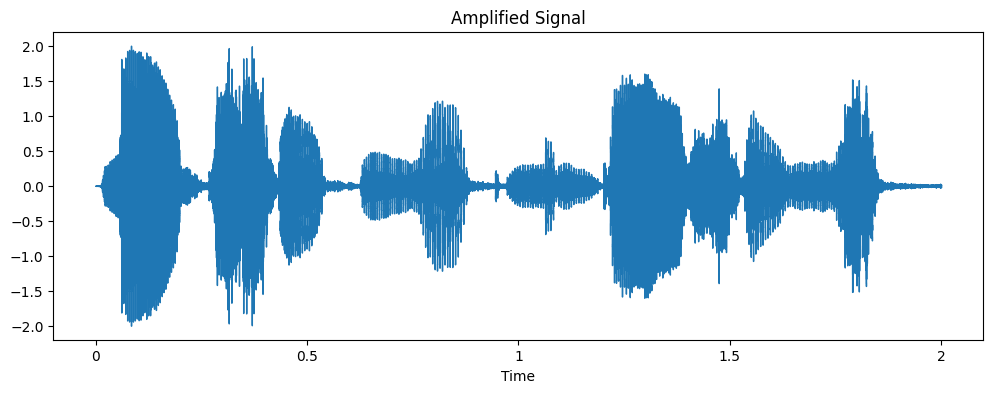

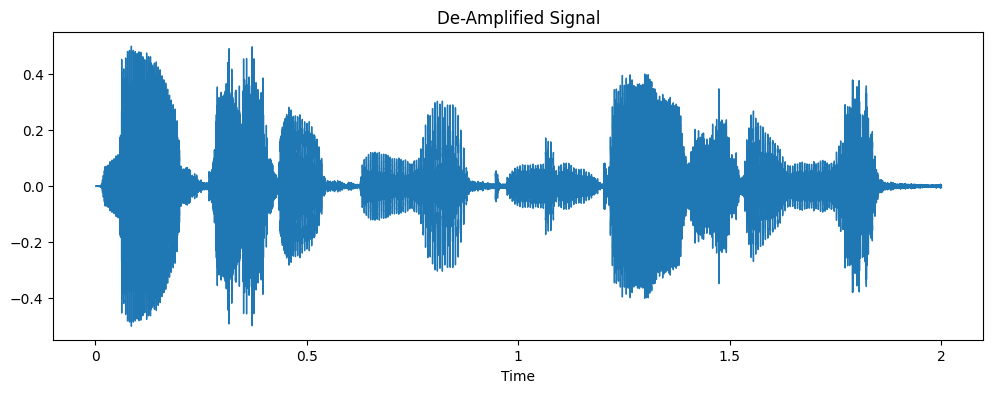

In [15]:

y_amp = y_norm * 2


y_deamp = y_norm * 0.5

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_amp, sr=sr)
plt.title("Amplified Signal")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_deamp, sr=sr)
plt.title("De-Amplified Signal")
plt.show()


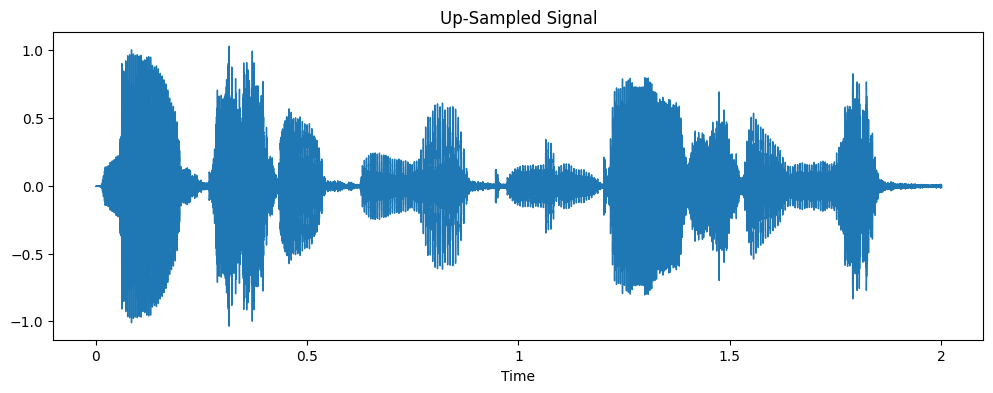

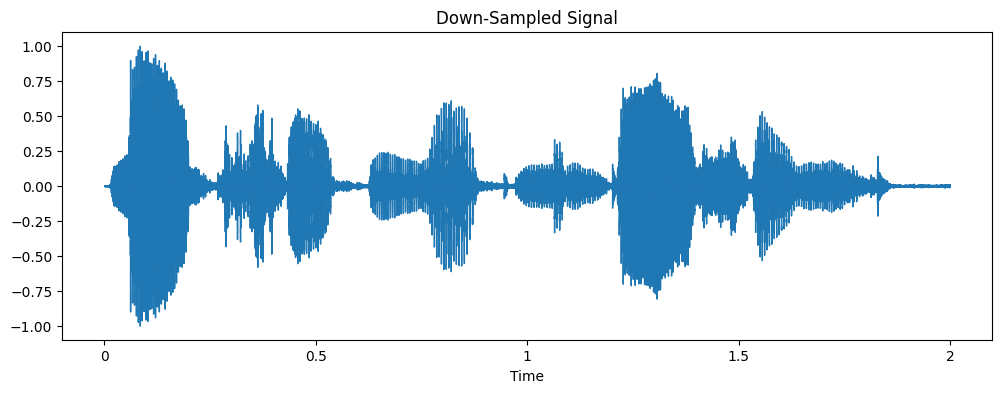

In [16]:

y_up = resample(y_norm, len(y_norm)*2)


y_down = resample(y_norm, len(y_norm)//2)

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_up, sr=sr*2)
plt.title("Up-Sampled Signal")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.waveshow(y_down, sr=sr//2)
plt.title("Down-Sampled Signal")
plt.show()


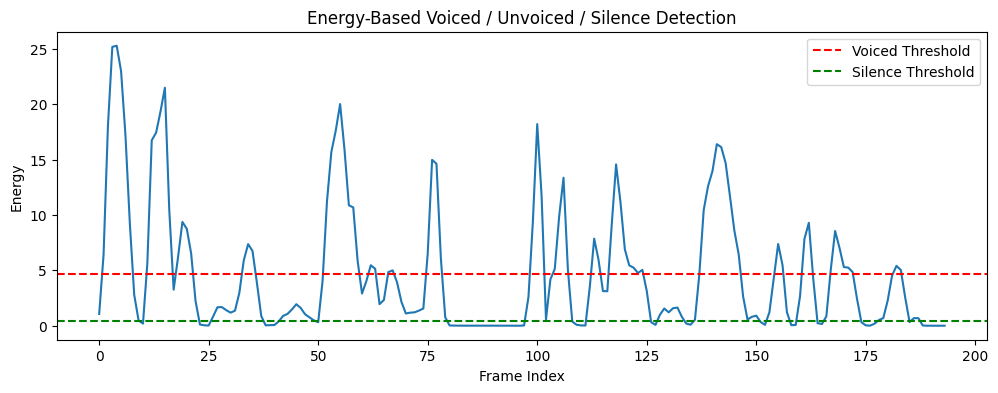

In [17]:
plt.figure(figsize=(12,4))
plt.plot(energy)
plt.axhline(np.mean(energy), color='r', linestyle='--', label='Voiced Threshold')
plt.axhline(np.mean(energy)*0.1, color='g', linestyle='--', label='Silence Threshold')
plt.title("Energy-Based Voiced / Unvoiced / Silence Detection")
plt.xlabel("Frame Index")
plt.ylabel("Energy")
plt.legend()
plt.show()


In [18]:
Audio(y_norm, rate=sr)
